In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df=pd.read_csv('ENB2012_data.csv')

In [42]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Our target variable is heating load i.e Y1 although there are two target variables Y1 and Y2.
X1-X8 are our features, on performing EDA we will gain more insights from the data.

In [43]:
data=df.copy()

In [44]:
data=data.iloc[:,:-1]

In [45]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [47]:
data.shape

(768, 9)

In [48]:
df.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


We can clearly see that there are no null values in the data. As we know that linear regression has certain assumptions one of them being that the data should not have highly correlated features. So let us proceed to check the correlation between the features.

<Axes: >

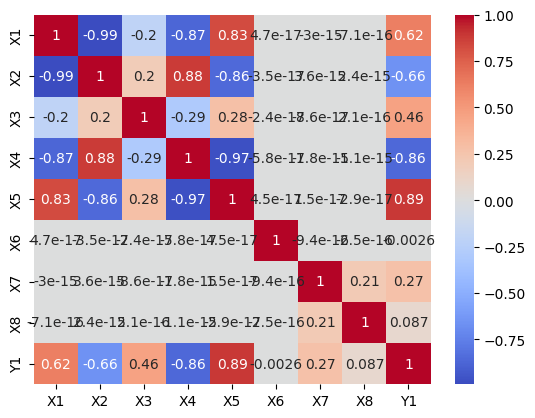

In [49]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

We can clearly see here that X2 and X4 are highly correlated and X1 and X5 are highly correlated. Removing X5 although won't be a good decision as we can see it is highly correlated to our target variable. So we can remove X1 and X4 for better performance of Linear regression model.

In [50]:
data.drop(columns=['X1','X4'],inplace=True)

<Axes: >

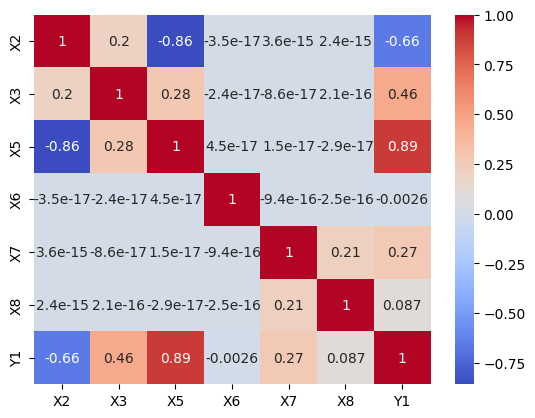

In [51]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: >

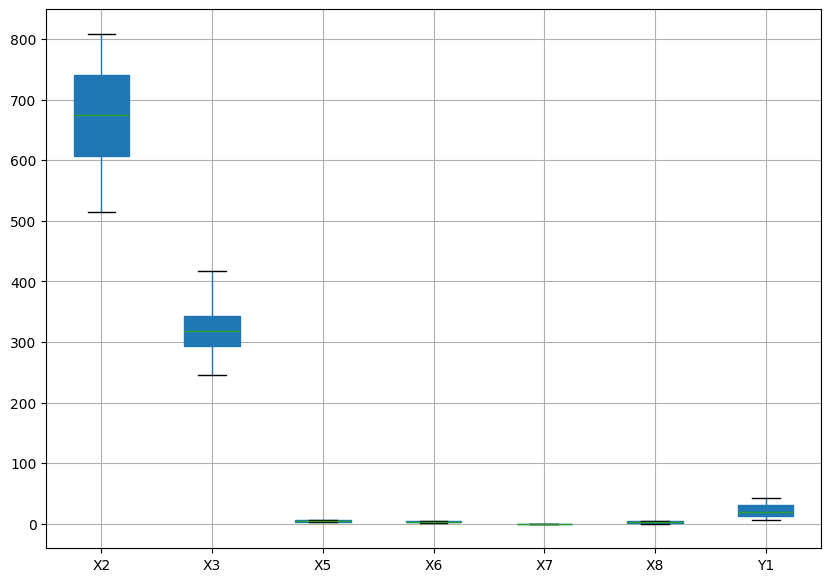

In [52]:
plt.figure(figsize = (10, 7))

data.boxplot(vert=True,patch_artist=True)

In [53]:
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR=Q3-Q1
  ll=Q1-1.5*IQR
  ul=Q3+1.5*IQR
  data=data[(data[col]>ll)&(data[col]<ul)]

In [54]:
data.shape

(704, 7)

Here we have removed the outliers.

Now moving ahead as we have removed outliers. Another assumption for linear regression is having a normalized data thereby we need to normalize our data for it's better efficiency.

In [55]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred=lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

In [60]:
r2

0.8933067110704788

In [61]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred=y_pred,y_true=y_test)
rmse

2.8581295518345526

In [62]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mse

8.16890453506998

For mannual model, we need normalized data

In [63]:
for i in range(0,data.shape[1]-1):
  data.iloc[:,i]=((data.iloc[:,i]-np.mean(data.iloc[:,i]))/(np.std(data.iloc[:,i]))).astype(float)

<ipython-input-63-2d658be9f82e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -1.341641
1     -0.447214
2      0.447214
3      1.341641
4     -1.341641
         ...   
763    1.341641
764   -1.341641
765   -0.447214
766    0.447214
767    1.341641
Name: X6, Length: 704, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i]=((data.iloc[:,i]-np.mean(data.iloc[:,i]))/(np.std(data.iloc[:,i]))).astype(float)
<ipython-input-63-2d658be9f82e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -1.814575
1     -1.814575
2     -1.814575
3     -1.814575
4     -1.814575
         ...   
763    1.411336
764    1.411336
765    1.411336
766    1.411336
767    1.411336
Name: X8, Length: 704, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtyp

In [64]:
class MultiLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [65]:
new_lr=MultiLR()

In [66]:
new_lr.fit(X_train,y_train)

In [67]:
y_pred_new=new_lr.predict(X_test)

In [68]:
r2=r2_score(y_test,y_pred_new)
print(r2)

0.8933067110704919


In [69]:
rmse=root_mean_squared_error(y_pred=y_pred_new,y_true=y_test)
print(rmse)

2.8581295518343763


In [70]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_new)
print(mse)

8.168904535068974


We can clearly see here that the scores we got from linear regression from sklearn and the one we made from scratch almost same.